In [1]:
%config InlineBackend.figure_format = 'retina'

# Individual predictor training - Horizon: 40 datapoints

This Jupyter notebook is the second out of three notebooks that are used to train the individual predictors to benchmark the system performance. In total, 15 individual predictors will be trained on stock and index data. For the benchmarking process, predictors from the predictorsI.py and predictorsII.py are trained. Each predictor will be served with an input batch that is used to dertmine the forecast estimation. The input size will be set at 20 data points (20 trading days). Furthermore, 3 forecasting horizions are considered: 5, 30 and 40 datapoints into the future.

In [2]:
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsIII.py

## Dataset

The third dataset used is the S&P 500 (^GSPC). Prices are in USD and listed on SNP. The data is extracted via the Yahoo Finance API accessed via the pandas data reader function. The adjusting closing price was used to train the following predictors.

Link to website: https://uk.finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

In [12]:
data = DataLoader('^GSPC', '2010-01-01', '2018-01-01')
prices = data.get_adjclose()

In [13]:
print(data)

Total count of rows: 2013
Ticker: ^GSPC
Start: 2010-01-01
End: 2018-01-01


In [14]:
data.statistics()

,High,Low,Open,Close,Volume,Adj Close
count,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000
mean,1753.468063,1736.600179,1745.309675,1745.880929,3.749912e+09,1745.880929
std,438.586053,439.145837,438.868087,438.888644,8.493332e+08,438.888644
min,1032.949951,1010.909973,1027.650024,1022.580017,1.025000e+09,1022.580017
25%,1334.400024,1320.709961,1328.660034,1328.260010,3.241030e+09,1328.260010
50%,1810.880005,1800.770020,1806.329956,1805.810059,3.632350e+09,1805.810059
75%,2095.610107,2078.459961,2087.629883,2088.000000,4.134680e+09,2088.000000
max,2694.969971,2685.919922,2692.709961,2690.159912,1.061781e+10,2690.159912


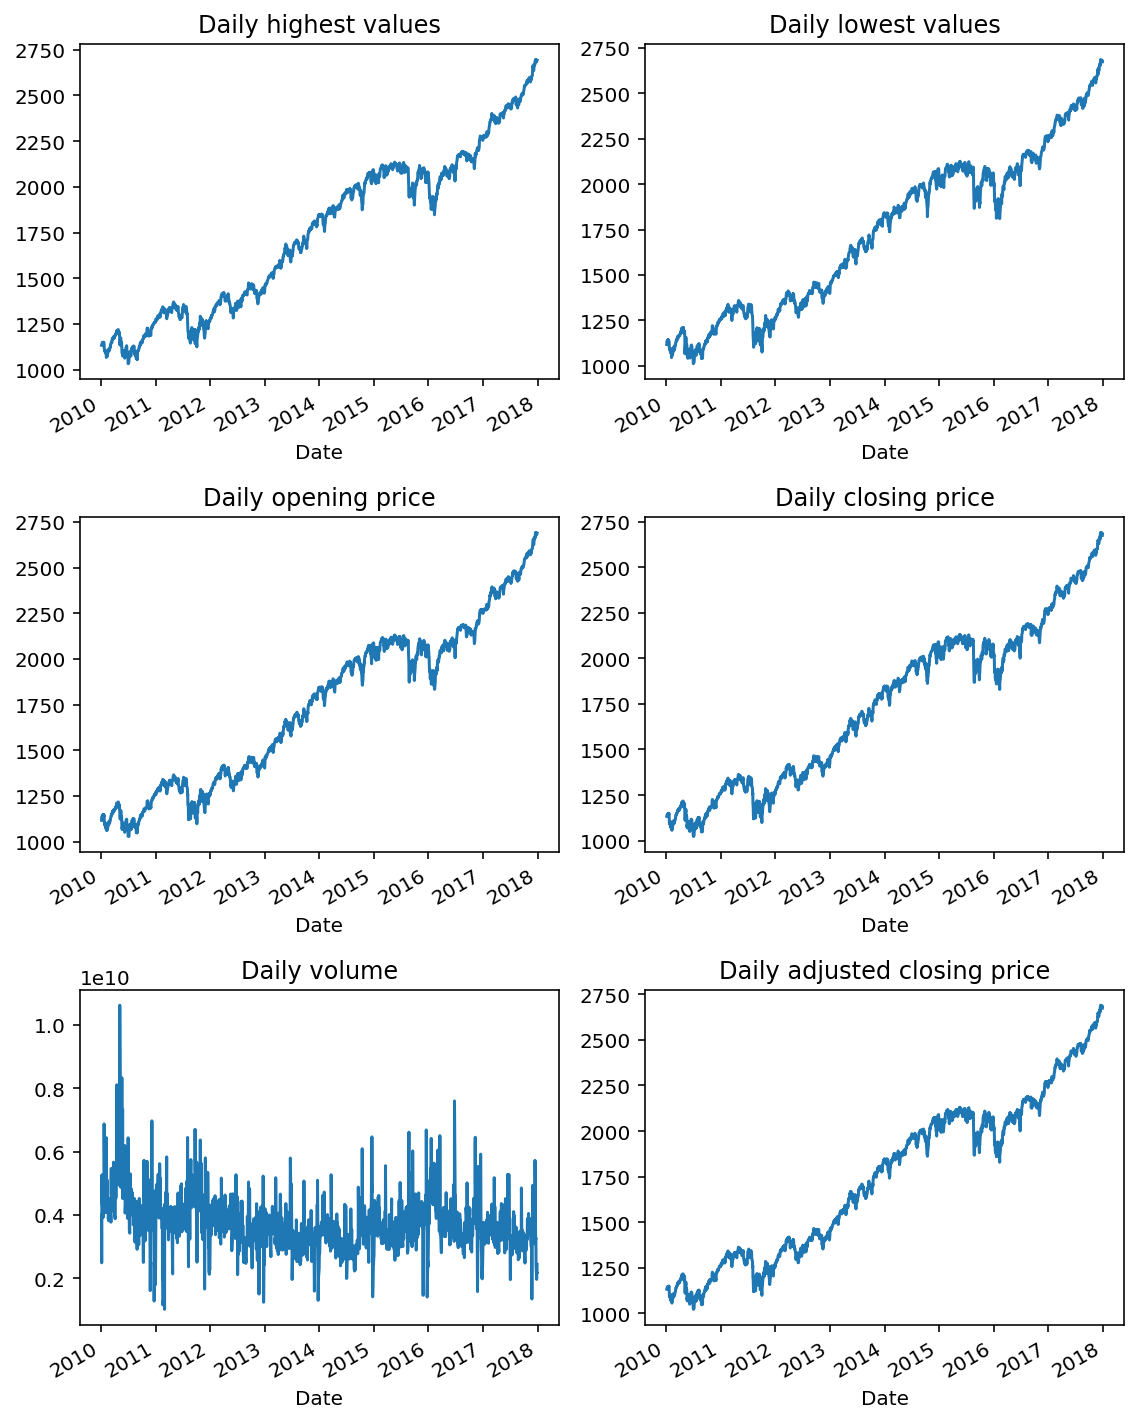

In [15]:
data.plotting_grid()

In [16]:
predictor11 = BasicUnivariatePredictor(20, 40, prices)
predictor11.create_lstm()
predictor11.model_blueprint()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 40)            6720      
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 50)            18200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
Total params: 47,160
Trainable params: 47,160
Non-trainable params: 0
_________________________________________________________________


In [17]:
predictor11.fit_model(80, 0)

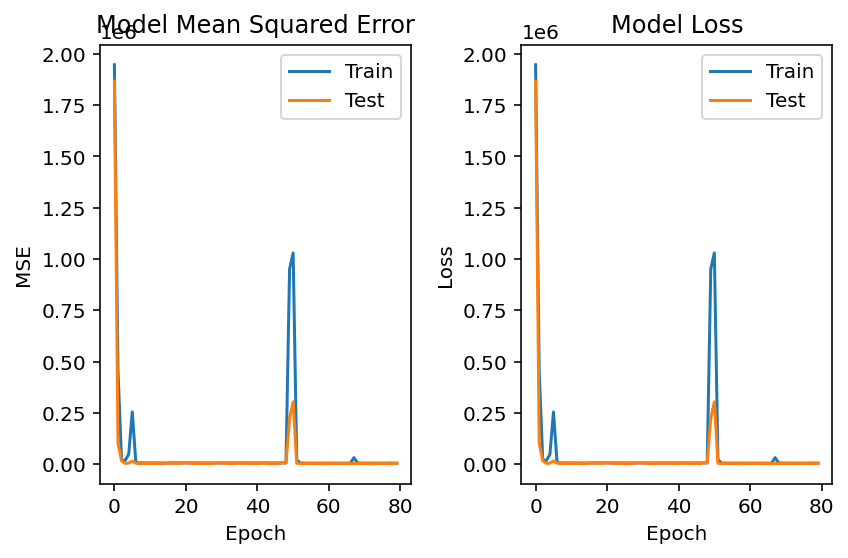

In [18]:
predictor11.show_performance()

In [19]:
predictor11.save_model()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\notebooks\assets


In [20]:
predictor12 = BasicUnivariatePredictor(20, 40, prices)
predictor12.create_mlp()
predictor12.model_blueprint()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1040      
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [21]:
predictor12.fit_model(80, 0)

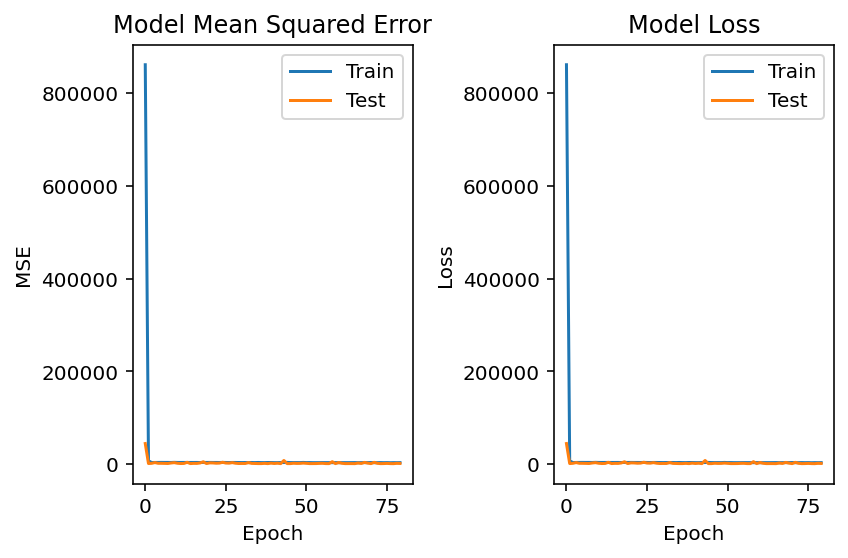

In [22]:
predictor12.show_performance()

In [23]:
predictor12.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\notebooks\assets


In [24]:
predictor13 = BasicUnivariatePredictor(20, 40, prices)
predictor13.create_cnn()
predictor13.model_blueprint()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 19, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 32)            4128      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                14450     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2040      
Total params: 20,810
Trainable params: 20,810
Non-trainable params: 0
__________________________________________________

In [25]:
predictor13.fit_model(80, 0)

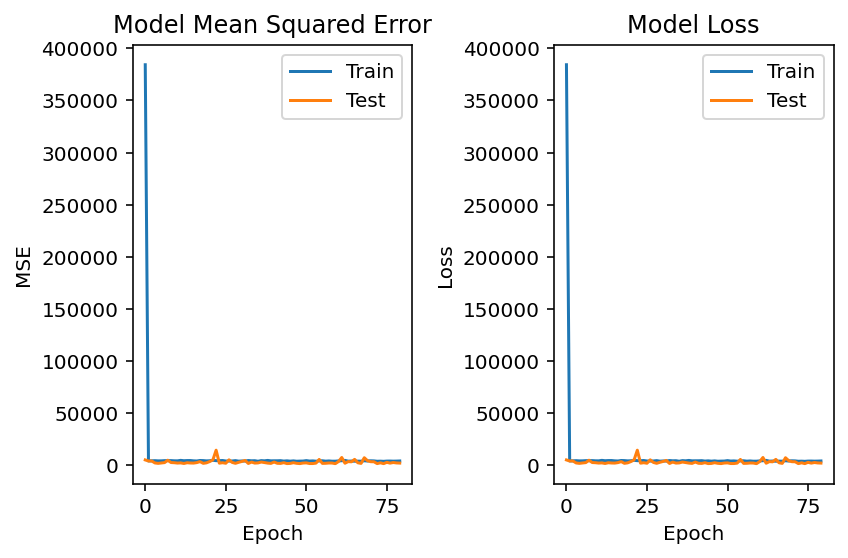

In [26]:
predictor13.show_performance()

In [27]:
predictor13.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\notebooks\assets


In [28]:
predictor14 = BasicUnivariatePredictor(20, 40, prices)
predictor14.create_bilstm()
predictor14.model_blueprint()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 20, 100)           20800     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_8 (Dense)              (None, 40)                2040      
Total params: 53,040
Trainable params: 53,040
Non-trainable params: 0
_________________________________________________________________


In [29]:
predictor14.fit_model(80, 0)

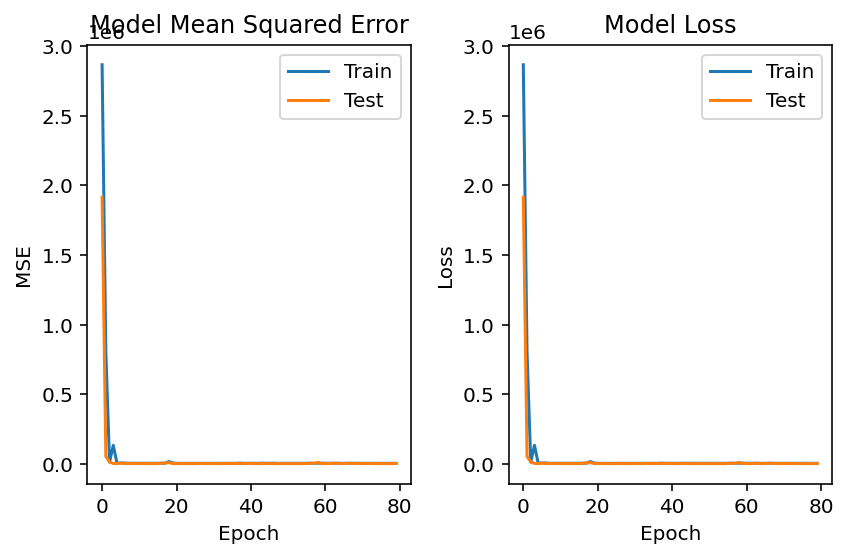

In [30]:
predictor14.show_performance()

In [31]:
predictor14.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\notebooks\assets


In [32]:
predictor15 = HybridUnivariatePredictor(2, 20, 40, prices)
predictor15.create_cnnlstm()
predictor15.model_blueprint()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 9, 64)       192       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 8, 32)       4128      
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 4, 32)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 50)          35800     
_________________________________________________________________
lstm_9 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_9 (Dense)              (None, 40)               

In [33]:
predictor15.fit_model(80, 0)

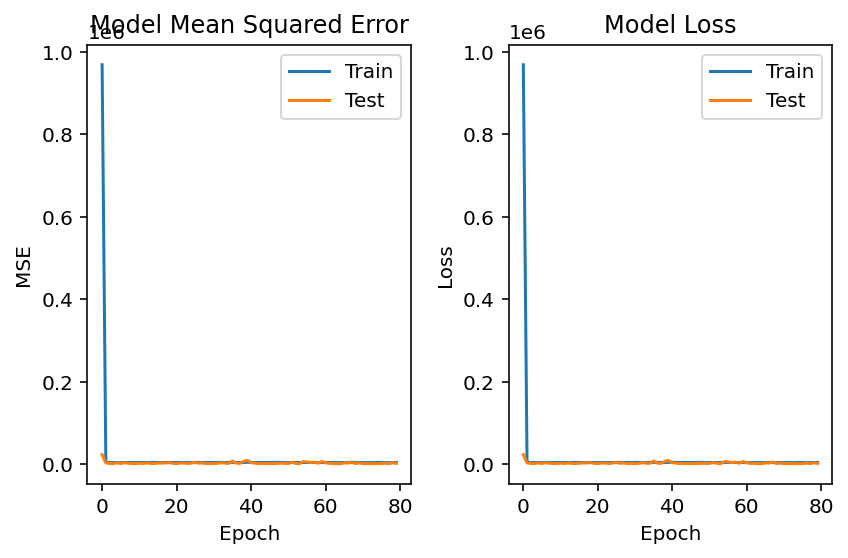

In [34]:
predictor15.show_performance()

In [35]:
predictor15.save_model()

INFO:tensorflow:Assets written to: C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\notebooks\assets
